# ESOL Dataset - Molecular Solubility Prediction

## Exploratory Data Analysis

In [1]:
# Importing Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors



# Disable UserWarnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
# Download directly into your raw data folder
url = "https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/delaney-processed.csv"

data = pd.read_csv(url)

# Save to data/raw/
data.to_csv("/Users/sarvesh/Desktop/GitHub/molecular-property-prediction/data/raw/esol.csv", index=False)
data.head()


,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


Renaming the columns for aesthetic purposes and to improve readability.

In [3]:
# Renaming Columns

data = data.rename(columns={'ESOL predicted log solubility in mols per litre': 'Predicted Log Solubility (mol/L)',
                            'measured log solubility in mols per litre': 'Measured Log Solubility (mol/L)',
                            'smiles': 'SMILES'
                            })

data.head()

,Compound ID,Predicted Log Solubility (mol/L),Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,Measured Log Solubility (mol/L),SMILES
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


## Experimental

In [4]:
# Step 1: Basic Exploration
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")
pd.DataFrame(data.columns)


Rows: 1128, Columns: 10


,0
0,Compound ID
1,Predicted Log Solubility (mol/L)
2,Minimum Degree
3,Molecular Weight
4,Number of H-Bond Donors
5,Number of Rings
6,Number of Rotatable Bonds
7,Polar Surface Area
8,Measured Log Solubility (mol/L)
9,SMILES


In [5]:
data.dtypes

Compound ID                          object
Predicted Log Solubility (mol/L)    float64
Minimum Degree                        int64
Molecular Weight                    float64
Number of H-Bond Donors               int64
Number of Rings                       int64
Number of Rotatable Bonds             int64
Polar Surface Area                  float64
Measured Log Solubility (mol/L)     float64
SMILES                               object
dtype: object

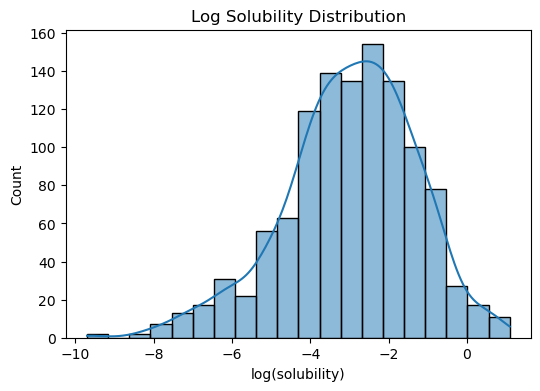

In [6]:
target = data['Predicted Log Solubility (mol/L)']

# Step 2: Plot target property distribution

plt.figure(figsize=(6,4))
sns.histplot(target, kde=True, bins=20)
plt.title("Log Solubility Distribution")
plt.xlabel("log(solubility)")
plt.show()


## Actual

**Examining SMILES data**

In [7]:
data['SMILES'][:4]

0    OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1                               Cc1occc1C(=O)Nc2ccccc2
2                                 CC(C)=CCCC(C)=CC(=O)
3                   c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
Name: SMILES, dtype: object

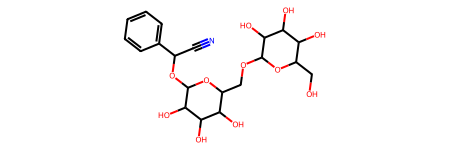

In [8]:

m = Chem.MolFromSmiles(data.SMILES[0])

m

In [9]:
m.GetNumAtoms()

32

Converting SMILES data to RDKit objects

In [10]:
molecule_list = []

for element in data.SMILES:
    molecule = Chem.MolFromSmiles(element)
    molecule_list.append(molecule)

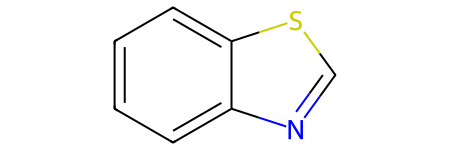

In [11]:
molecule_list[5]

## Molecular Descriptors

### 1. Octanol-Water Partition Coefficient [LogP] 

Generating LogP values for each element using 'Descriptors' from RDKit

In [12]:
logp_values = []

for molecule in molecule_list:
    mol_LogP = Descriptors.MolLogP(molecule)
    logp_values.append(mol_LogP)

In [13]:
print(logp_values[:5])

[-3.1080199999999985, 2.840320000000001, 2.878000000000001, 6.299400000000004, 1.7480999999999998]


In [14]:
data['Log P'] = logp_values

data.head()

,Compound ID,Predicted Log Solubility (mol/L),Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,Measured Log Solubility (mol/L),SMILES,Log P
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,-3.10802
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2,2.84032
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O),2.87800
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,6.29940
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1,1.74810


### 2. Aromatic Proportion